In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [23]:
original_data = "../data/"
folder_path = "../data_processed/blasted_cleaned/"
model_path = "../models/"

df_train = pd.read_csv(folder_path+"train_values_blasted.csv")
df_train_y = pd.read_csv(original_data+"train_labels.csv")

df_test = pd.read_csv(folder_path+"test_values_blasted.csv")

df_train['sequence_len'] = df_train.sequence.str.len()
df_test['sequence_len'] = df_test.sequence.str.len()

y = df_train_y.loc[:,[ "sequence_id"]].copy()
y["label"] = df_train_y.drop(["sequence_id"], axis=1).idxmax(axis=1)

df_train = df_train.merge(y, how="left", on="sequence_id")
print("train shape:", df_train.shape)
print("test shape", df_test.shape)
df_train.head()

train shape: (63017, 55)
test shape (18816, 54)


,sequence_id,sequence,bacterial_resistance_ampicillin,bacterial_resistance_chloramphenicol,bacterial_resistance_kanamycin,bacterial_resistance_other,bacterial_resistance_spectinomycin,copy_number_high_copy,copy_number_low_copy,copy_number_unknown,growth_strain_ccdb_survival,growth_strain_dh10b,growth_strain_dh5alpha,growth_strain_neb_stable,growth_strain_other,growth_strain_stbl3,growth_strain_top10,growth_strain_xl1_blue,growth_temp_30,growth_temp_37,growth_temp_other,selectable_markers_blasticidin,selectable_markers_his3,selectable_markers_hygromycin,selectable_markers_leu2,selectable_markers_neomycin,selectable_markers_other,selectable_markers_puromycin,selectable_markers_trp1,selectable_markers_ura3,selectable_markers_zeocin,species_budding_yeast,species_fly,species_human,species_mouse,species_mustard_weed,species_nematode,species_other,species_rat,species_synthetic,species_zebrafish,qseqid,sseqid,pident,length,mismatch,gapopen,sstart,send,evalue,stitle,blast_ft_eng_1,blast_aligned_fraction,sequence_len,label
0,9ZIMC,CATGCATTAGTTATTAATAGTAATCAATTACGGGGTCATTAGTTCA...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9ZIMC,gb|DQ022572.1|,99.940,3341.0,1.0,1.0,2392.0,5731.0,0.000000e+00,"Expression vector pEGFP-Pax9, complete sequence",gb,0.467207,7151,RYUA3GVO
1,5SAQC,GCTGGATGGTTTGGGACATGTGCAGCCCCGTCTCTGTATGGAGTGA...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5SAQC,dbj|AB061324.1|,94.855,447.0,23.0,0.0,58.0,504.0,0.000000e+00,Mus musculus PGC-1v mRNA for PPAR gamma coacti...,dbj,0.980263,456,RYUA3GVO
2,E7QRO,NNCCGGGCTGTAGCTACACAGGGCGGAGATGAGAGCCCTACGAAAG...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,E7QRO,gb|U63648.1|,96.748,246.0,5.0,3.0,9.0,253.0,2.250000e-110,Mus musculus p160 myb-binding protein (P160) m...,gb,0.169655,1450,RYUA3GVO
3,CT5FP,GCGGAGATGAAGAGCCCTACGAAAGCTGAGCCTGCGACTCCCGCAG...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,CT5FP,ref|NM_016776.3|,99.835,606.0,1.0,0.0,61.0,666.0,0.000000e+00,Mus musculus MYB binding protein (P160) 1a (My...,ref,0.663020,914,RYUA3GVO
4,7PTD8,CGCGCATTACTTCACATGGTCCTCAAGGGTAACATGAAAGTGATCC...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7PTD8,gb|U63648.1|,99.307,577.0,4.0,0.0,606.0,1182.0,0.000000e+00,Mus musculus p160 myb-binding protein (P160) m...,gb,0.427407,1350,RYUA3GVO


In [24]:
df_train.blast_ft_eng_1[df_train.blast_ft_eng_1.isna()] = 'NA'
df_test.blast_ft_eng_1[df_test.blast_ft_eng_1.isna()] = 'NA'

/home/ccchang0111/anaconda3/envs/altlabs/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ccchang0111/anaconda3/envs/altlabs/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
print(df_train.label.nunique(), "total unique labels")

1314 total unique labels


## 2. reorganize columns

In [28]:
col2keep = ["pident", "length", "sstart", "send", "mismatch", "gapopen", 
            "evalue", "blast_ft_eng_1", "blast_aligned_fraction", "sequence_len", "label"]

df_train2 = df_train.loc[:, col2keep]
df_test2 = df_test.loc[:, col2keep]

/home/ccchang0111/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [29]:
df_train2.head()

,pident,length,sstart,send,mismatch,gapopen,evalue,blast_ft_eng_1,blast_aligned_fraction,sequence_len,label
0,99.940,3341.0,2392.0,5731.0,1.0,1.0,0.000000e+00,gb,0.467207,7151,RYUA3GVO
1,94.855,447.0,58.0,504.0,23.0,0.0,0.000000e+00,dbj,0.980263,456,RYUA3GVO
2,96.748,246.0,9.0,253.0,5.0,3.0,2.250000e-110,gb,0.169655,1450,RYUA3GVO
3,99.835,606.0,61.0,666.0,1.0,0.0,0.000000e+00,ref,0.663020,914,RYUA3GVO
4,99.307,577.0,606.0,1182.0,4.0,0.0,0.000000e+00,gb,0.427407,1350,RYUA3GVO


In [35]:
idx = df_train.columns.str.contains("bacterial_")
df_train2["bacterial_resistance"] = df_train.loc[:, idx].idxmax(axis=1)

idx = df_train.columns.str.contains("copy_number")
df_train2["copy_number"] = df_train.loc[:, idx].idxmax(axis=1)

idx = df_train.columns.str.contains("growth_strain")
df_train2["growth_strain"] = df_train.loc[:, idx].idxmax(axis=1)

idx = df_train.columns.str.contains("growth_temp")
df_train2["growth_temp"] = df_train.loc[:, idx].idxmax(axis=1)

idx = df_train.columns.str.contains("selectable_markers")
df_train2["selectable_markers"] = df_train.loc[:, idx].idxmax(axis=1)

idx = df_train.columns.str.contains("species_")
df_train2["species"] = df_train.loc[:, idx].idxmax(axis=1)

In [36]:
idx = df_test.columns.str.contains("bacterial_")
df_test2["bacterial_resistance"] = df_test.loc[:, idx].idxmax(axis=1)

idx = df_test.columns.str.contains("copy_number")
df_test2["copy_number"] = df_test.loc[:, idx].idxmax(axis=1)

idx = df_test.columns.str.contains("growth_strain")
df_test2["growth_strain"] = df_test.loc[:, idx].idxmax(axis=1)

idx = df_test.columns.str.contains("growth_temp")
df_test2["growth_temp"] = df_test.loc[:, idx].idxmax(axis=1)

idx = df_test.columns.str.contains("selectable_markers")
df_test2["selectable_markers"] = df_test.loc[:, idx].idxmax(axis=1)

idx = df_test.columns.str.contains("species_")
df_test2["species"] = df_test.loc[:, idx].idxmax(axis=1)

In [37]:
copy_number_recode = {
    "copy_number_high_copy":1,
    "copy_number_low_copy":0,
    "copy_number_unknown":-999
}
growth_temp_recode = {
    "growth_temp_37":37,
    "growth_temp_30":30,
    "growth_temp_other":-999,
}

df_train2.copy_number = df_train2.copy_number.map(copy_number_recode)
df_train2.growth_temp = df_train2.growth_temp.map(growth_temp_recode)

df_test2.copy_number = df_test2.copy_number.map(copy_number_recode)
df_test2.growth_temp = df_test2.growth_temp.map(growth_temp_recode)

In [38]:
# shuffle training data
df_train2 = df_train2.sample(frac=1.0, random_state=77)
df_train2.head()

,pident,length,sstart,send,mismatch,gapopen,evalue,blast_ft_eng_1,blast_aligned_fraction,sequence_len,label,bacterial_resistance,copy_number,growth_strain,growth_temp,selectable_markers,species
6495,100.000,2603.0,6290.0,8892.0,0.0,0.0,0.0,gb,0.614495,4236,QZD4I9UW,bacterial_resistance_ampicillin,1,growth_strain_dh5alpha,37,selectable_markers_blasticidin,species_budding_yeast
46153,100.000,4232.0,2964.0,7195.0,0.0,0.0,0.0,NA,0.279488,15142,UFAQZXPY,bacterial_resistance_ampicillin,1,growth_strain_neb_stable,37,selectable_markers_puromycin,species_mustard_weed
24199,100.000,4078.0,4820.0,8897.0,0.0,0.0,0.0,dbj,0.781226,5220,KDW3ZVWJ,bacterial_resistance_kanamycin,-999,growth_strain_dh5alpha,37,selectable_markers_neomycin,species_human
53244,99.923,1304.0,6556.0,5253.0,1.0,0.0,0.0,NA,0.197546,6601,T9LSOTV6,bacterial_resistance_spectinomycin,1,growth_strain_dh5alpha,37,selectable_markers_blasticidin,species_synthetic
12936,99.231,780.0,428.0,1207.0,6.0,0.0,0.0,ref,0.887372,879,W9QZOUW7,bacterial_resistance_kanamycin,1,growth_strain_dh5alpha,37,selectable_markers_blasticidin,species_human


## Training

In [9]:
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

In [55]:
x = list(df_train2.columns)
y = "label"

x.remove(y)

print(x)

x_factors = ["blast_ft_eng_1", "bacterial_resistance", "growth_strain",
             "selectable_markers", "species"]

['pident', 'length', 'sstart', 'send', 'mismatch', 'gapopen', 'evalue', 'blast_ft_eng_1', 'blast_aligned_fraction', 'sequence_len', 'bacterial_resistance', 'copy_number', 'growth_strain', 'growth_temp', 'selectable_markers', 'species']


In [56]:
lb_enc_dict = {}
for x_factor in x_factors:
    lb_enc_dict[x_factor] = LabelEncoder()
    df_train2[x_factor] = lb_enc_dict[x_factor].fit_transform(df_train2[x_factor])
    df_train2[x_factor] = df_train2[x_factor].astype('category')

lb_enc_dict[y] = LabelEncoder()
df_train2[y] = lb_enc_dict[y].fit_transform(df_train2[y])
#df_train2[y] = df_train2[y].astype('category')

In [12]:
df_train2.head()

,pident,length,sstart,send,mismatch,gapopen,evalue,blast_ft_eng_1,blast_aligned_fraction,sequence_len,label,bacterial_resistance,copy_number,growth_strain,growth_temp,selectable_markers,species
6495,100.000,2603.0,6290.0,8892.0,0.0,0.0,0.0,3,0.614495,4236,983,0,1,2,37,0,0
46153,100.000,4232.0,2964.0,7195.0,0.0,0.0,0.0,0,0.279488,15142,1119,0,1,3,37,6,4
24199,100.000,4078.0,4820.0,8897.0,0.0,0.0,0.0,1,0.781226,5220,761,2,-999,2,37,4,2
53244,99.923,1304.0,6556.0,5253.0,1.0,0.0,0.0,0,0.197546,6601,1065,4,1,2,37,0,8
12936,99.231,780.0,428.0,1207.0,6.0,0.0,0.0,5,0.887372,879,1179,2,1,2,37,0,2


In [13]:
cutoff_idx = int(len(df_train2)*0.9)
train_df = df_train2.iloc[0:cutoff_idx]
valid_df = df_train2.iloc[cutoff_idx:]

d_train = lgb.Dataset(train_df[x], label=train_df[y], feature_name = x, categorical_feature=x_factors)
d_valid = lgb.Dataset(valid_df[x], label=valid_df[y], feature_name = x, categorical_feature=x_factors)

In [14]:
params = {
    #"max_bin": 512,
    "num_classes": train_df[y].nunique(),
    "learning_rate": 0.005,
    "num_leaves": 100,
    "boosting_type": "gbdt",
    "objective": "multiclass",
    #"class_weight": "balanced",
    #"n_estimators": 1000,
    #"num_leaves": 10,
    "verbose": -1,
    #"importance_type": "gain",
    "saved_feature_importance_type": 1,
    #"min_data": 100,
    #"boost_from_average": True
}

In [15]:
model = lgb.train(params, 
                  d_train, 
                  num_boost_round=500, 
                  valid_sets=d_valid, 
                  early_stopping_rounds=50)

/home/ccchang0111/anaconda3/envs/altlabs/lib/python3.6/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/home/ccchang0111/anaconda3/envs/altlabs/lib/python3.6/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/home/ccchang0111/anaconda3/envs/altlabs/lib/python3.6/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's multi_logloss: 4.78663
Training until validation scores don't improve for 50 rounds
[2]	valid_0's multi_logloss: 4.56837
[3]	valid_0's multi_logloss: 4.42267
[4]	valid_0's multi_logloss: 4.30816
[5]	valid_0's multi_logloss: 4.21227
[6]	valid_0's multi_logloss: 4.131
[7]	valid_0's multi_logloss: 4.05847
[8]	valid_0's multi_logloss: 3.99318
[9]	valid_0's multi_logloss: 3.93522
[10]	valid_0's multi_logloss: 3.88166
[11]	valid_0's multi_logloss: 3.83304
[12]	valid_0's multi_logloss: 3.78674
[13]	valid_0's multi_logloss: 3.74351
[14]	valid_0's multi_logloss: 3.70307
[15]	valid_0's multi_logloss: 3.6649
[16]	valid_0's multi_logloss: 3.62905
[17]	valid_0's multi_logloss: 3.59527
[18]	valid_0's multi_logloss: 3.56349
[19]	valid_0's multi_logloss: 3.53285
[20]	valid_0's multi_logloss: 3.50349
[21]	valid_0's multi_logloss: 3.47552
[22]	valid_0's multi_logloss: 3.44877
[23]	valid_0's multi_logloss: 3.42296
[24]	valid_0's multi_logloss: 3.39828
[25]	valid_0's multi_logloss: 3.37451
[

[213]	valid_0's multi_logloss: 2.15955
[214]	valid_0's multi_logloss: 2.15768
[215]	valid_0's multi_logloss: 2.15586
[216]	valid_0's multi_logloss: 2.15404
[217]	valid_0's multi_logloss: 2.15225
[218]	valid_0's multi_logloss: 2.15048
[219]	valid_0's multi_logloss: 2.1487
[220]	valid_0's multi_logloss: 2.14693
[221]	valid_0's multi_logloss: 2.14519
[222]	valid_0's multi_logloss: 2.14343
[223]	valid_0's multi_logloss: 2.1417
[224]	valid_0's multi_logloss: 2.13998
[225]	valid_0's multi_logloss: 2.13828
[226]	valid_0's multi_logloss: 2.13661
[227]	valid_0's multi_logloss: 2.13498
[228]	valid_0's multi_logloss: 2.13333
[229]	valid_0's multi_logloss: 2.13168
[230]	valid_0's multi_logloss: 2.13009
[231]	valid_0's multi_logloss: 2.12849
[232]	valid_0's multi_logloss: 2.12692
[233]	valid_0's multi_logloss: 2.12536
[234]	valid_0's multi_logloss: 2.12378
[235]	valid_0's multi_logloss: 2.12225
[236]	valid_0's multi_logloss: 2.1207
[237]	valid_0's multi_logloss: 2.11918
[238]	valid_0's multi_loglos

[424]	valid_0's multi_logloss: 2.01009
[425]	valid_0's multi_logloss: 2.01017
[426]	valid_0's multi_logloss: 2.01023
[427]	valid_0's multi_logloss: 2.01031
[428]	valid_0's multi_logloss: 2.01038
[429]	valid_0's multi_logloss: 2.01045
[430]	valid_0's multi_logloss: 2.01054
[431]	valid_0's multi_logloss: 2.01062
[432]	valid_0's multi_logloss: 2.01069
[433]	valid_0's multi_logloss: 2.01076
[434]	valid_0's multi_logloss: 2.01086
[435]	valid_0's multi_logloss: 2.01097
[436]	valid_0's multi_logloss: 2.01107
[437]	valid_0's multi_logloss: 2.01122
[438]	valid_0's multi_logloss: 2.01134
[439]	valid_0's multi_logloss: 2.01145
[440]	valid_0's multi_logloss: 2.01158
[441]	valid_0's multi_logloss: 2.01166
[442]	valid_0's multi_logloss: 2.01179
[443]	valid_0's multi_logloss: 2.01195
[444]	valid_0's multi_logloss: 2.01207
[445]	valid_0's multi_logloss: 2.01221
[446]	valid_0's multi_logloss: 2.01237
[447]	valid_0's multi_logloss: 2.01251
[448]	valid_0's multi_logloss: 2.01265
[449]	valid_0's multi_log

In [16]:
ft_imp = pd.DataFrame({"feature":model.feature_name(), 
                       "importance":model.feature_importance()})
ft_imp = ft_imp.sort_values('importance', ascending=False).reset_index(drop=True)

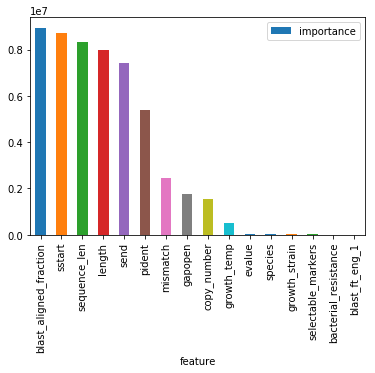

In [17]:
ft_imp.plot.bar(x='feature', y='importance')

In [20]:
model.save_model(model_path+"lgbm_epoch_1000.txt")

## Validation

In [18]:
y_lbe = lb_enc_dict[y]

preds = model.predict(valid_df[x])
preds = pd.DataFrame(preds, columns=y_lbe.classes_)

In [60]:
preds.head()

,00Q4V31T,012VT4JK,028IO5W2,03GRNN7N,03Y3W51H,09MQV1TY,0A4AHRCT,0A9M05NC,0B9GCUVV,0CL7QVG8,0CML4B5I,0DTHTJLJ,0FFBBVE1,0HWCWFNU,0L3Y6ZB2,0M44GDO8,0MDYJM3H,0N3V9P9M,0NP55E93,0PJ91ZT6,0R296F9R,0T2AZBD6,0URA80CN,0VRP2DI6,0W6O08VX,0WHP4PPK,0XPTGGLP,0XS4FHP3,0Y24J5G2,10TEBWK2,11TTDKTM,131RRHBV,13LZE1F7,14PBN8C2,15D0Z97U,15S88O4Q,18C9J8EH,19CAUKJB,1AP294AT,1B9BJ2IP,1BE35FI1,1CIHYCE4,1DJ9L58E,1DTDCRUO,1EDZ6CA7,1HCQTAYT,1HK4VXP8,1IXFZ3HO,1K11RCST,1KC6XYO6,1KNFJ6KQ,1KZHNVYR,1LBGAU5Z,1NXRMDN6,1OQJ21E9,1OWZDF82,1PA232PA,1PIGWQFY,1Q1IUY3G,1S515B69,1TC200QC,1TI4HS4X,1UOA7CA1,1UREJUSJ,1UU0CHTK,1VPOX8VI,1VQS4WNS,1X0VC0O1,1XU60MET,1ZC8RPN1,20ABQYHS,20CEB9KE,216DWMG6,21ZFBX5E,24SL2992,25UVYUID,26KK8UM5,27OS3BTP,28D4D4QM,298AMR5C,29D6Q091,2AQG6I31,2BAFY4GP,2CJHRNWD,2FCX4O0X,2GGU2QA2,2GSZMU46,2GTLIT33,2H37WPKA,2HNZZYDB,2JPNC9X6,2KDACBQT,2L336TQL,2M3CXS8N,2MCB7LXW,2MQ2NPMA,2NEXWXMT,2PY8K6GU,2Q33W599,2SSVM7H9,2TVMHQTW,2TXY439E,2VP4JPB9,2VTLZHDS,2VX4F6RC,2XC1478M,2XX0N87I,2Y9L13L4,2YCH1PUI,2YLQA8OZ,303BN0Z0,318RH8P0,330L4OIV,33AR5KVE,343M819H,34TE1Q0A,35MKXPL0,36W150XW,36XLYYGZ,37VO60SB,384ASNLB,38MDETY1,38MEQ4SU,39LLQ2PB,39TEZ0C3,39TPBOL7,3BGLF8BC,3C2VZQ2R,3C952KY7,3D9CMQ4V,3EARN0Z7,3EYBG174,3EZXYI3U,3FPH0N6R,3FW33G68,3GEXBRC0,3KCEM7V4,3L314D8W,3LSNTL1N,3MDRJUI2,3MX1D3LD,3N169DM2,3NSJ6N02,3O1GIAV7,3QP4D23X,3RK54JUW,3TLD81QQ,3TUFYWQN,3TXFYNKG,3X2GGDHW,3XE0BJDW,3YAQWNBK,3YEGUN04,3YYEC52Y,40MD0YZ3,40ZI3TDN,443NZOSB,448QVC4C,44N2CYI9,459BZKP3,4648UZGD,46AZ97U9,48F0EUVN,49571DXY,49YZILWR,4CKAV3LS,4DGGCYVE,4DGMNDIC,4E7187A9,4GF31RCS,4GHCND6Z,4IADYZ8R,4IDTMY10,4J7KEYE2,4KSHU5M7,4LCFACE1,4LQ8L195,4M3XG8RC,4O39WLXM,4O5RQHEF,4PKCMX7O,4QK5ZDHA,4QU07FT7,4RCA1UZG,4RHLX089,4S1LIWGV,4TIT4L5F,4U5LAAN5,4VHMF1RI,4WAQ4VFB,4WRI77CU,4X2RTV2D,4Y4DT3SL,4ZYW54M8,50NBGIOB,52Y9GFGK,54C6PEBH,54ZFOPSF,558GIQ68,55HTZ7T0,579G0TJI,57FHO8YC,57NGF1YS,58BSUZQB,5ASQZ0OT,5AUVXXDU,5BNUT8AW,5BTY65G6,5CBNCRST,5FUDT1QA,5H71LUBY,5K2PTY6L,5KXWXV9G,5LH9NUMK,5OBD73W0,5OF7OYEA,5OFUVG9U,5PC2F8NE,5PR9OSRS,5Q9ETXJL,5QLBIUXN,5QY2HU8J,5SCOFTY2,5SGMS705,5V3Z108E,5W2PCT95,5X9VNAN3,5Z4CMIY5,5ZB8I3T0,5ZW05824,60HBQEP8,62PKSARW,638UYIQC,64FFXH4M,65CCBIXK,669R7ER0,66XSSS3Q,685KTH3G,68OY1RK5,69M351P4,6AT20D5S,6DBY872A,6E28DNQK,6KT0EAKX,6LQ0W02R,6NCTAA30,6NKNB308,6NULQ6KP,6PS2LHCV,6PXRABDR,...,T8R673OI,T9LSOTV6,T9ZHWQE9,TBJE6V15,TBUHVONI,TCKOTGYJ,TD593FIM,TE1TWCPZ,TFTOGJOD,TGPPSF7M,THD393NW,THW6JGC7,TI21BGNU,TIAPP57M,TJLVHJ87,TK932JM1,TKLYRWYO,TNR495LD,TQAA3UHV,TRM5SRRW,TTU1NVDI,TU2W2LCB,TUO2TVTX,TVQC1R4D,TWH1XFPL,TWV05PEP,TYJN7K7A,TYQ2T01H,TZ8JAEO6,TZL79DYX,U0U7F3EW,U2C1NG0D,U2C2VVY8,U2OZU4IY,U2VWRM3F,U2ZEEFLD,U3QRAT06,U47IUY9C,U49ISLNE,U5966IDO,U5ZJCLCX,U69N21WU,U6DS14AT,U6TNOS7M,U74I1JYB,U8FRHWSV,U8SWTHB5,UAY0HW9A,UBO7MS4D,UBWK5LJH,UBXL2EGE,UC094GDG,UCC4KYQL,UCVUALGM,UEZVPK90,UFAQZXPY,UFEO02VM,UFTYVG6Y,UH5Z524P,UHU62P41,UJNF3UO2,UJSK2U9A,UK4B4I7A,UKG1R822,ULOHU3PC,ULVU086L,UMDZG9XM,UMM76IOX,UMOD7PGG,UNAGKRY0,UNE947CO,UO4MVLJS,UP3750KB,UQUIUCVA,URO46KFW,URY1ZVZI,US8KF8X3,UVXQ3O4K,UWWS6RWO,UXK3D4GF,UYCX4ZJS,UYLJZRPN,UYPE34HA,V04Z48C3,V1YVL2DL,V3JDHWOB,V4A28VLV,V4RKPN30,V5C3CWTK,V6X2Z58S,V8MF2IKQ,VAGUTU8C,VB04AEHZ,VDSDXJ71,VDYHUCQB,VE48SF8D,VFCTUL5J,VFOEJ2CS,VGCXUCRO,VGWO9SBA,VHPX9GYO,VJU9EYFE,VKN3L279,VKU9G6Y5,VMU0L6UM,VO0ATBFS,VOT8OKU2,VRZZPHI4,VW6ZY2L1,VYW7T8YY,VZLS9GCK,W184Y53L,W1STLS0T,W2DYAZID,W7WRIFC0,W9QZOUW7,WAL364PD,WB78G3XF,WBGCVIO8,WD8MHX8N,WDNYZZHJ,WG42FGWA,WG7S6W2T,WHLUO40S,WK162QYQ,WK4NBYSB,WKRC8NSD,WKYJ6R7D,WL3FJI96,WL8VMHWG,WM3Q8LBC,WM9JWC4B,WNEX0Y1X,WP6H3E2T,WQ1DVVYG,WQBN4WGH,WRDZ1CVS,WSHPKJ3H,WTFS8JV2,WTYMIZ88,WUARWGNF,WUR2UJYP,WWDAZG6C,WX0HMR4F,WZX61W39,WZZLL8O4,X0VJJXGQ,X2PFPX2S,X4WO7LHO,X4YNMN9Z,X6497O49,X6LFEBK7,X920R0YN,X9RNN0YD,XCWSW5T9,XD80LQN2,XE4D68OI,XHQPAVRU,XLYFD8RW,XOEVMQZT,XP1SRNTB,XP5B8615,XPQ9IYZC,XR7GR7UE,XRENDLF1,XSA3Y2H6,XTKRJ8N6,XU8GASLQ,XV32YHEZ,XY9JOM6L,XYB5NWR4,Y060M6TK,Y324NGPN,Y3HA6UDE,Y4G53L4X,Y4X5JU76,Y575VUS1,Y5YH740Y,Y620TYKH,Y6EC9YQA,Y73L2QKM,Y81SHRRC,YCD71LRY,YCNWCC0Z,YCY2FFYZ,YDPNP1KR,YE9BU3J3,YEA0ZZZP,YEZ30YUQ,YFSGJUTL,YGFI5B9G,YGFIQ8SA,YHUR7HZ6,YHX2594T

In [19]:
sum(preds.idxmax(axis=1) == y_lbe.inverse_transform(valid_df[y]))/len(valid_df)

0.6799428752776896

## Make Prediction

In [ ]:
sample_test = pd.read_csv(original_data+"submission_format_3TFRxH6.csv")
print(sample_test.shape)
sample_test.head()

In [51]:
## preproc test dataset
df_test2.blast_ft_eng_1 = df_test2.blast_ft_eng_1.apply(lambda x: "NA" if 'tpe' in x else x)

In [52]:
for x_factor in x_factors: 
    df_test2[x_factor] = lb_enc_dict[x_factor].transform(df_test2[x_factor])
    df_test2[x_factor] = df_test2[x_factor].astype('category')

In [54]:
df_test2.head()

,pident,length,sstart,send,mismatch,gapopen,evalue,blast_ft_eng_1,blast_aligned_fraction,sequence_len,label,bacterial_resistance,copy_number,growth_strain,growth_temp,selectable_markers,species
0,99.927,2757.0,2554.0,5310.0,0.0,1.0,0.0,3,0.293955,9379,NaN,0,-999,2,37,0,9
1,99.790,2384.0,1434.0,3817.0,1.0,1.0,0.0,0,0.357261,6673,NaN,3,1,2,37,9,2
2,99.938,3219.0,3401.0,6619.0,2.0,0.0,0.0,2,0.355927,9044,NaN,0,-999,3,37,4,0
3,100.000,1230.0,249.0,1478.0,0.0,0.0,0.0,5,1.000000,1230,NaN,4,1,2,37,0,2
4,100.000,2803.0,2982.0,5784.0,0.0,0.0,0.0,0,0.439479,6378,NaN,0,1,2,37,0,2


In [61]:
test_preds = model.predict(df_test2[x])
test_preds = pd.DataFrame(test_preds, columns=y_lbe.classes_)

In [73]:
test_preds['sequence_id'] = df_test.sequence_id
test_preds = test_preds[sample_test.columns.values]

In [74]:
print(test_preds.shape)
test_preds.head()

(18816, 1315)


,sequence_id,00Q4V31T,012VT4JK,028IO5W2,03GRNN7N,03Y3W51H,09MQV1TY,0A4AHRCT,0A9M05NC,0B9GCUVV,0CL7QVG8,0CML4B5I,0DTHTJLJ,0FFBBVE1,0HWCWFNU,0L3Y6ZB2,0M44GDO8,0MDYJM3H,0N3V9P9M,0NP55E93,0PJ91ZT6,0R296F9R,0T2AZBD6,0URA80CN,0VRP2DI6,0W6O08VX,0WHP4PPK,0XPTGGLP,0XS4FHP3,0Y24J5G2,10TEBWK2,11TTDKTM,131RRHBV,13LZE1F7,14PBN8C2,15D0Z97U,15S88O4Q,18C9J8EH,19CAUKJB,1AP294AT,1B9BJ2IP,1BE35FI1,1CIHYCE4,1DJ9L58E,1DTDCRUO,1EDZ6CA7,1HCQTAYT,1HK4VXP8,1IXFZ3HO,1K11RCST,1KC6XYO6,1KNFJ6KQ,1KZHNVYR,1LBGAU5Z,1NXRMDN6,1OQJ21E9,1OWZDF82,1PA232PA,1PIGWQFY,1Q1IUY3G,1S515B69,1TC200QC,1TI4HS4X,1UOA7CA1,1UREJUSJ,1UU0CHTK,1VPOX8VI,1VQS4WNS,1X0VC0O1,1XU60MET,1ZC8RPN1,20ABQYHS,20CEB9KE,216DWMG6,21ZFBX5E,24SL2992,25UVYUID,26KK8UM5,27OS3BTP,28D4D4QM,298AMR5C,29D6Q091,2AQG6I31,2BAFY4GP,2CJHRNWD,2FCX4O0X,2GGU2QA2,2GSZMU46,2GTLIT33,2H37WPKA,2HNZZYDB,2JPNC9X6,2KDACBQT,2L336TQL,2M3CXS8N,2MCB7LXW,2MQ2NPMA,2NEXWXMT,2PY8K6GU,2Q33W599,2SSVM7H9,2TVMHQTW,2TXY439E,2VP4JPB9,2VTLZHDS,2VX4F6RC,2XC1478M,2XX0N87I,2Y9L13L4,2YCH1PUI,2YLQA8OZ,303BN0Z0,318RH8P0,330L4OIV,33AR5KVE,343M819H,34TE1Q0A,35MKXPL0,36W150XW,36XLYYGZ,37VO60SB,384ASNLB,38MDETY1,38MEQ4SU,39LLQ2PB,39TEZ0C3,39TPBOL7,3BGLF8BC,3C2VZQ2R,3C952KY7,3D9CMQ4V,3EARN0Z7,3EYBG174,3EZXYI3U,3FPH0N6R,3FW33G68,3GEXBRC0,3KCEM7V4,3L314D8W,3LSNTL1N,3MDRJUI2,3MX1D3LD,3N169DM2,3NSJ6N02,3O1GIAV7,3QP4D23X,3RK54JUW,3TLD81QQ,3TUFYWQN,3TXFYNKG,3X2GGDHW,3XE0BJDW,3YAQWNBK,3YEGUN04,3YYEC52Y,40MD0YZ3,40ZI3TDN,443NZOSB,448QVC4C,44N2CYI9,459BZKP3,4648UZGD,46AZ97U9,48F0EUVN,49571DXY,49YZILWR,4CKAV3LS,4DGGCYVE,4DGMNDIC,4E7187A9,4GF31RCS,4GHCND6Z,4IADYZ8R,4IDTMY10,4J7KEYE2,4KSHU5M7,4LCFACE1,4LQ8L195,4M3XG8RC,4O39WLXM,4O5RQHEF,4PKCMX7O,4QK5ZDHA,4QU07FT7,4RCA1UZG,4RHLX089,4S1LIWGV,4TIT4L5F,4U5LAAN5,4VHMF1RI,4WAQ4VFB,4WRI77CU,4X2RTV2D,4Y4DT3SL,4ZYW54M8,50NBGIOB,52Y9GFGK,54C6PEBH,54ZFOPSF,558GIQ68,55HTZ7T0,579G0TJI,57FHO8YC,57NGF1YS,58BSUZQB,5ASQZ0OT,5AUVXXDU,5BNUT8AW,5BTY65G6,5CBNCRST,5FUDT1QA,5H71LUBY,5K2PTY6L,5KXWXV9G,5LH9NUMK,5OBD73W0,5OF7OYEA,5OFUVG9U,5PC2F8NE,5PR9OSRS,5Q9ETXJL,5QLBIUXN,5QY2HU8J,5SCOFTY2,5SGMS705,5V3Z108E,5W2PCT95,5X9VNAN3,5Z4CMIY5,5ZB8I3T0,5ZW05824,60HBQEP8,62PKSARW,638UYIQC,64FFXH4M,65CCBIXK,669R7ER0,66XSSS3Q,685KTH3G,68OY1RK5,69M351P4,6AT20D5S,6DBY872A,6E28DNQK,6KT0EAKX,6LQ0W02R,6NCTAA30,6NKNB308,6NULQ6KP,6PS2LHCV,...,T8R673OI,T9LSOTV6,T9ZHWQE9,TBJE6V15,TBUHVONI,TCKOTGYJ,TD593FIM,TE1TWCPZ,TFTOGJOD,TGPPSF7M,THD393NW,THW6JGC7,TI21BGNU,TIAPP57M,TJLVHJ87,TK932JM1,TKLYRWYO,TNR495LD,TQAA3UHV,TRM5SRRW,TTU1NVDI,TU2W2LCB,TUO2TVTX,TVQC1R4D,TWH1XFPL,TWV05PEP,TYJN7K7A,TYQ2T01H,TZ8JAEO6,TZL79DYX,U0U7F3EW,U2C1NG0D,U2C2VVY8,U2OZU4IY,U2VWRM3F,U2ZEEFLD,U3QRAT06,U47IUY9C,U49ISLNE,U5966IDO,U5ZJCLCX,U69N21WU,U6DS14AT,U6TNOS7M,U74I1JYB,U8FRHWSV,U8SWTHB5,UAY0HW9A,UBO7MS4D,UBWK5LJH,UBXL2EGE,UC094GDG,UCC4KYQL,UCVUALGM,UEZVPK90,UFAQZXPY,UFEO02VM,UFTYVG6Y,UH5Z524P,UHU62P41,UJNF3UO2,UJSK2U9A,UK4B4I7A,UKG1R822,ULOHU3PC,ULVU086L,UMDZG9XM,UMM76IOX,UMOD7PGG,UNAGKRY0,UNE947CO,UO4MVLJS,UP3750KB,UQUIUCVA,URO46KFW,URY1ZVZI,US8KF8X3,UVXQ3O4K,UWWS6RWO,UXK3D4GF,UYCX4ZJS,UYLJZRPN,UYPE34HA,V04Z48C3,V1YVL2DL,V3JDHWOB,V4A28VLV,V4RKPN30,V5C3CWTK,V6X2Z58S,V8MF2IKQ,VAGUTU8C,VB04AEHZ,VDSDXJ71,VDYHUCQB,VE48SF8D,VFCTUL5J,VFOEJ2CS,VGCXUCRO,VGWO9SBA,VHPX9GYO,VJU9EYFE,VKN3L279,VKU9G6Y5,VMU0L6UM,VO0ATBFS,VOT8OKU2,VRZZPHI4,VW6ZY2L1,VYW7T8YY,VZLS9GCK,W184Y53L,W1STLS0T,W2DYAZID,W7WRIFC0,W9QZOUW7,WAL364PD,WB78G3XF,WBGCVIO8,WD8MHX8N,WDNYZZHJ,WG42FGWA,WG7S6W2T,WHLUO40S,WK162QYQ,WK4NBYSB,WKRC8NSD,WKYJ6R7D,WL3FJI96,WL8VMHWG,WM3Q8LBC,WM9JWC4B,WNEX0Y1X,WP6H3E2T,WQ1DVVYG,WQBN4WGH,WRDZ1CVS,WSHPKJ3H,WTFS8JV2,WTYMIZ88,WUARWGNF,WUR2UJYP,WWDAZG6C,WX0HMR4F,WZX61W39,WZZLL8O4,X0VJJXGQ,X2PFPX2S,X4WO7LHO,X4YNMN9Z,X6497O49,X6LFEBK7,X920R0YN,X9RNN0YD,XCWSW5T9,XD80LQN2,XE4D68OI,XHQPAVRU,XLYFD8RW,XOEVMQZT,XP1SRNTB,XP5B8615,XPQ9IYZC,XR7GR7UE,XRENDLF1,XSA3Y2H6,XTKRJ8N6,XU8GASLQ,XV32YHEZ,XY9JOM6L,XYB5NWR4,Y060M6TK,Y324NGPN,Y3HA6UDE,Y4G53L4X,Y4X5JU76,Y575VUS1,Y5YH740Y,Y620TYKH,Y6EC9YQA,Y73L2QKM,Y81SHRRC,YCD71LRY,YCNWCC0Z,YCY2FFYZ,YDPNP1KR,YE9BU3J3,YEA0ZZZP,YEZ30YUQ,YFSGJUTL,YGFI5B9G,YGFIQ8SA,YHUR7HZ6,YHX25

In [75]:
test_preds.to_csv("../results/submission_20201004.csv", index=False)